In [1]:
import os

os.chdir("..")

In [2]:
import torch
from src.pipeline_qwen_omini_image_edit import QwenOminiImageEditPipeline
from PIL import Image
from utils import optimise_image_condition
from src.qwen_omini_image_edit_utils import forward
import types


/home/ubuntu/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [3]:
# !export HF_HUB_CACHE=./cache

In [4]:
# pipeline = QwenOminiImageEditPipeline.from_pretrained("Qwen/Qwen-Image-Edit")
pipeline = QwenOminiImageEditPipeline.from_pretrained("ovedrive/qwen-image-edit-4bit")
print("pipeline loaded")
pipeline.to(torch.bfloat16)
pipeline.to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are loading your model in 8bit or 4bit but no linear modules were found in your model. Please double check your model architecture, or submit an issue on github if you think this is a bug.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The module 'Qwen2_5_VLForConditionalGeneration' has been loaded in `bitsandbytes` 4bit and conversion to torch.bfloat16 is not supported. Module is still in 4bit precision.
The module 'QwenImageTransformer2DModel' has been loaded in `bitsandbytes` 4bit and conversion to torch.bfloat16 is not supported. Module is still in 4bit precision.
The module 'AutoencoderKLQwenImage' has been loaded in `bitsandbytes` 4bit and conversion to torch.bfloat16 is not supported. Module is still in 4bit precision.


pipeline loaded


QwenOminiImageEditPipeline {
  "_class_name": "QwenOminiImageEditPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "ovedrive/qwen-image-edit-4bit",
  "processor": [
    "transformers",
    "Qwen2VLProcessor"
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "Qwen2_5_VLForConditionalGeneration"
  ],
  "tokenizer": [
    "transformers",
    "Qwen2Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "QwenImageTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLQwenImage"
  ]
}

In [5]:
# pipeline.set_progress_bar_config(disable=None)

In [6]:

# pipeline.transformer.forward = types.MethodType(forward, pipeline.transformer)

In [8]:
image.size

(1392, 752)

In [5]:
image = Image.open("assets/scene_01.png").convert("RGB")
reference = Image.open("assets/boy_reference_512.png").convert("RGB")

width, height = image.size


prompt = "Add a boy to the image."


seed = torch.Generator().manual_seed(42)

inputs = {
    "image": image,
    "prompt": prompt,
    "generator": seed,
    "true_cfg_scale": 4.0,
    "negative_prompt": " ",
    "num_inference_steps": 20,
}

with torch.inference_mode():
    output = pipeline(**inputs)
    output_image = output.images[0]
    output_image.save("output_image_edit.png")
    print("image saved at", os.path.abspath("output_image_edit.png"))



  0%|          | 0/20 [00:00<?, ?it/s]

new forward
new rope
rope_key 0_48_88
ids?? [8, 28, 28]
rope_key 1_48_88
ids?? [8, 28, 28]
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_key 1_48_88
img_emb [[(1, 48, 88), (1, 48, 88)]]
new forward
new rope
rope_key 0_48_88
rope_k

/home/ubuntu/.local/lib/python3.10/site-packages/diffusers/image_processor.py:148: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


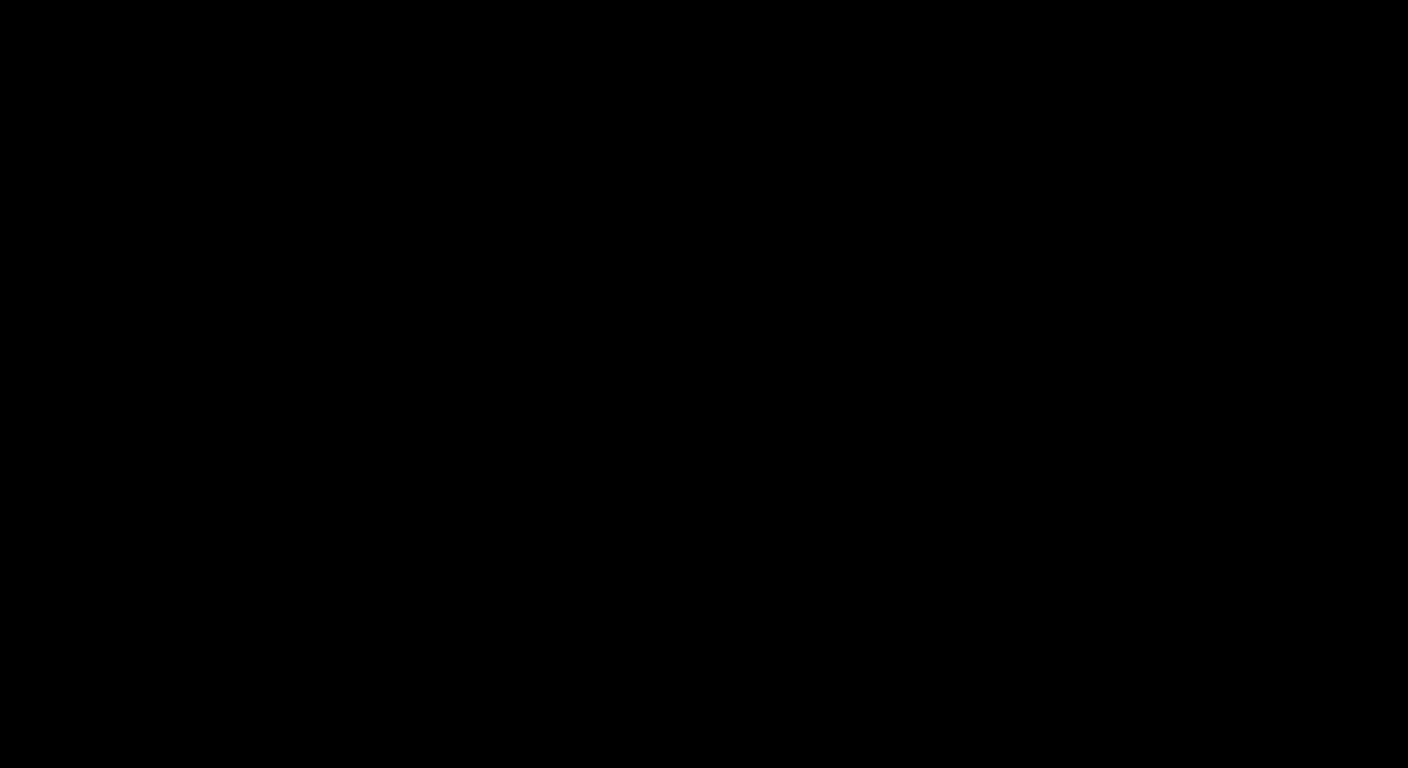

In [8]:
output_image

In [7]:
pipe.load_lora_weights(
    "saquiboye/omini-kontext-character",
    weight_name="character_3000.safetensors",
    adapter_name="lora_weights"
)

Loading adapter weights from state_dict led to unexpected keys found in the model: single_transformer_blocks.0.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.0.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.1.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.1.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.2.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.2.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.3.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.3.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.4.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.4.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.5.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.5.proj_out.lora_B.lora_weights.weight, single_transformer_blocks.6.proj_out.lora_A.lora_weights.weight, single_transformer_blocks.6.proj_out.lora_B.lora_weights.weight, single_

In [8]:
seed = torch.Generator().manual_seed(42)
reference_delta = [0, 0, (1024 + 512)//16]

optimised_reference, reference_delta = optimise_image_condition(reference, reference_delta)

result_img = pipe(
    prompt=prompt,
    image=image,
    reference=optimised_reference,
    reference_delta=reference_delta,
    num_inference_steps=14,
    height=height,
    width=width,
    generator=seed,
).images[0]

100%|███████████████████████████████████████████████████████████████████████| 14/14 [00:23<00:00,  1.69s/it]


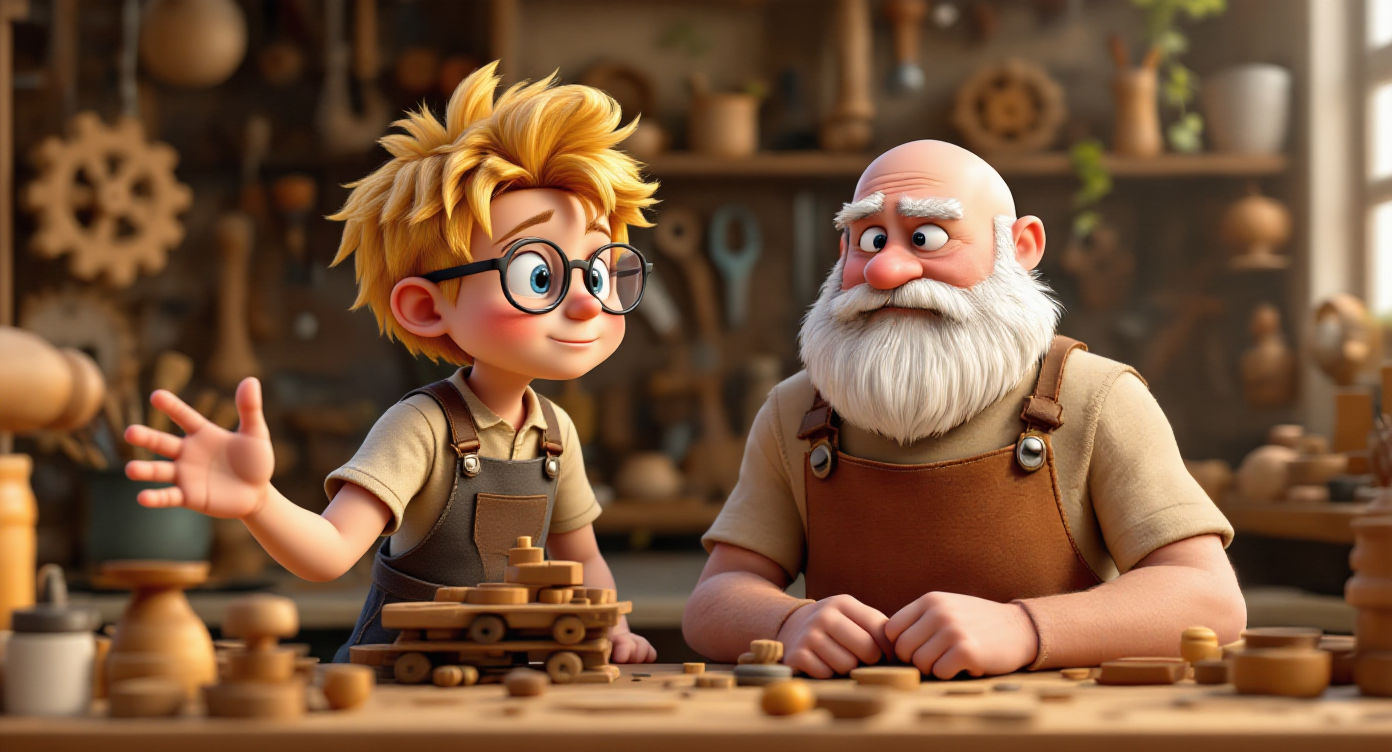

In [9]:
result_img